#### demo: Recipe for calculating WB

In [7]:
import sys, os, gsw
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xarray import open_dataset
import warnings
warnings.filterwarnings("ignore")

sys.path.append(os.path.abspath("../scripts"))
from buoyancy_potential_work import buoyancy_potential_work

1. Load data

In [8]:
file = "aoml/1900194/profiles/D1900194_120.nc"
urllib.request.urlretrieve(f'ftp://ftp.ifremer.fr/ifremer/argo/dac/{file}', f'data/{file.replace("/", "_")}')

data = open_dataset(f'data/{file.replace("/", "_")}')
data

<xarray.Dataset>
Dimensions:                       (N_PROF: 1, N_PARAM: 3, N_LEVELS: 51,
                                   N_CALIB: 1, N_HISTORY: 3)
Dimensions without coordinates: N_PROF, N_PARAM, N_LEVELS, N_CALIB, N_HISTORY
Data variables: (12/64)
    DATA_TYPE                     object ...
    FORMAT_VERSION                object ...
    HANDBOOK_VERSION              object ...
    REFERENCE_DATE_TIME           object ...
    PLATFORM_NUMBER               (N_PROF) object ...
    PROJECT_NAME                  (N_PROF) object ...
    ...                            ...
    HISTORY_ACTION                (N_HISTORY, N_PROF) object ...
    HISTORY_PARAMETER             (N_HISTORY, N_PROF) object ...
    HISTORY_START_PRES            (N_HISTORY, N_PROF) float32 ...
    HISTORY_STOP_PRES             (N_HISTORY, N_PROF) float32 ...
    HISTORY_PREVIOUS_VALUE        (N_HISTORY, N_PROF) float32 ...
    HISTORY_QCTEST                (N_HISTORY, N_PROF) object ...
Attributes:
    title:                Argo float vertical profile
    institution:          AOML
    source:               Argo float
    history:              2015-Mar-4 converted from 2.2 to 3.1 at UW
    references:           http://www.argodatamgt.org/Documentation
    comment:              free text
    user_manual_version:  3.1
    Conventions:          Argo-3.1 CF-1.6
    featureType:          trajectoryProfile

2. Define variables and use TEOS-10 

In [9]:

latitude = data.LATITUDE.data[0]
longitude = data.LONGITUDE.data[0]
pres = data.PRES_ADJUSTED.data[0]
temp = data.TEMP_ADJUSTED.data[0]
psal = data.PSAL_ADJUSTED.data[0]

asal = gsw.SA_from_SP(psal, pres, longitude, latitude)
ctemp = gsw.CT_from_t(asal, temp, pres)
rho = gsw.density.sigma0(asal, ctemp)
z_rho = gsw.z_from_p(pres, latitude)

3. Compute the Work done by buoyancy

In [10]:
wb, z_wb = buoyancy_potential_work(rho, z_rho)
wb

array([ 3.07830659e+03,  2.85629148e+03,  2.64496641e+03,  2.41680659e+03,
        2.23057483e+03,  2.02167644e+03,  1.75181259e+03,  1.53129289e+03,
        1.28858253e+03,  9.99442985e+02,  8.07987855e+02,  6.72462691e+02,
        5.22552594e+02,  4.40176005e+02,  3.73853228e+02,  3.69822045e+02,
        3.49238934e+02,  3.21358651e+02,  2.98087268e+02,  2.65914908e+02,
        2.51811973e+02,  2.26849729e+02,  1.98611218e+02,  1.92775038e+02,
        1.67562324e+02,  1.50922229e+02,  1.30027314e+02,  1.06998647e+02,
        9.89301401e+01,  8.47616815e+01,  6.80952026e+01,  6.05669535e+01,
        5.73556974e+01,  5.53012282e+01,  4.92535501e+01,  4.06202597e+01,
        2.29162962e+01,  7.07693390e-01,  6.98863427e-01,  5.47805169e-01,
       -1.82996702e-01, -1.84490081e-01, -2.77591714e-01, -3.58492242e-01,
       -4.88363832e-01, -2.04725534e-01, -1.18817919e-01, -2.22183421e-02,
        4.08143055e-02, -0.00000000e+00,  4.05461643e-04, -9.79177700e-03])

4. Figure

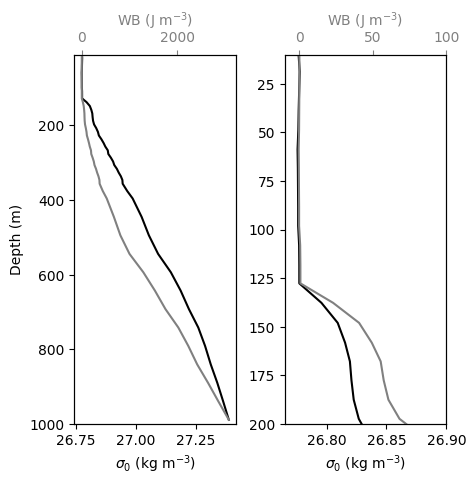

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(4.8, 4.8))

axs[0].plot(rho, z_rho*-1, c='black')
axs[0].set_xlabel(r"$\sigma_0$ (kg m$^{-3}$)")
axs[0].set_ylim(1000, 10)
axs[0].set_ylabel(r"Depth (m)")

ax2 = axs[0].twiny()
p1 = ax2.plot(wb, z_wb*-1, c="gray")
ax2.set_xlabel(r'WB (J m$^{-3}$)')
ax2.set_ylim(1000, 10)
ax2.xaxis.label.set_color(p1[0].get_color())
ax2.tick_params(axis='x', colors=p1[0].get_color())

axs[1].plot(rho, z_rho*-1, c='black')
axs[1].set_xlabel(r"$\sigma_0$ (kg m$^{-3}$)")
axs[1].set_xlim(26.765, 26.9)
axs[1].set_ylim(200, 10)

ax2 = axs[1].twiny()
p1 = ax2.plot(wb, z_wb*-1, c="gray")
ax2.set_xlabel(r'WB (J m$^{-3}$)')
ax2.set_xlim(-10, 100)
ax2.set_ylim(200, 10)
ax2.xaxis.label.set_color(p1[0].get_color())
ax2.tick_params(axis='x', colors=p1[0].get_color())

fig.subplots_adjust(wspace=0.3)
